## Projeto da aula de data sience em 2025:

# ADICIONAR A ORIGEM DOS DADOS
Este projeto faz parte da disciplina **Ciência de Dados (2025/1)** do **Instituto Federal de Rondônia**. A matéria é ministrada pelo professor [José Lucas Brandão Montes](https://github.com/zehlucas).

Existe [outro projeto associado à disciplina](https://github.com/zehlucas/IFRO-ADS-DataScience-2025), mantido pelo professor, que contém os códigos utilizados em aula para auxiliar os alunos no acompanhamento do conteúdo.

Optei por não seguir exatamente o formato proposto, pois o professor deixou essa escolha em aberto. Sinta-se à vontade para explorar este projeto e, caso tenha alguma dúvida, pode entrar em contato comigo.



## Configuração do ambiente:

In [ ]:
# Função shell que descomprime os arquivos zip

# Criando a pasta csv caso não exita
!mkdir -p ./csv

# Acessando a pasta dos zips e iterando os arquivos
!cd zips && for file in *.zip; do \
    # Descompactando os arquivos zip com o nome temp_extract
    unzip -o "$file" -d temp_extract && \
    # Movendo ele para a pasta csv
    mv temp_extract/*.csv ../csv/ && \
    # Limpando o que eu descomprimir
    rm -r temp_extract; \
done


Archive:  acidentes_2022.zip
  inflating: temp_extract/acidentes_2022.csv  
Archive:  localidades_2022.zip
  inflating: temp_extract/localidades_2022.csv  
Archive:  tipo_veiculo.zip
  inflating: temp_extract/tipo_veiculo.csv.csv  
Archive:  vitimas_2022.zip
  inflating: temp_extract/vitimas_2022.csv  


In [20]:
# Renomeando o csv por ele veio com o nome errado!
!mv csv/tipo_veiculo.csv.csv csv/tipo_veiculo.csv

In [15]:
# Adicionando as dependecias!
!pip freeze > requirements.txt

In [16]:
# Instalando as dependencies
!pip install -r requirements.txt

## Exploração dos dados:

#### Importado as dependencias:

In [35]:
import pandas as pd
import matplotlib.pyplot as plt


#### Lendo os arquivos:

In [23]:
acidentes = pd.read_csv('./csv/acidentes_2022.csv')
localidades  = pd.read_csv('./csv/localidades_2022.csv')
tipo_veiculos = pd.read_csv('./csv/tipo_veiculo.csv')
vitimas = pd.read_csv('./csv/vitimas_2022.csv')

/tmp/ipykernel_842106/2929211778.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  acidentes = pd.read_csv('./csv/acidentes_2022.csv')


#### Explorando os acidentes:

**Dicionário de Dados – Acidentes Rodoviários**

| Coluna                  | Descrição                                                                 |
|-------------------------|---------------------------------------------------------------------------|
| `num_acidente`          | Identificador único do acidente.                                          |
| `chv_localidade`        | Chave que identifica a localidade do acidente para relação com a tabela localidades.                            |
| `data_acidente`         | Data em que o acidente ocorreu (formato: AAAA-MM-DD).                     |
| `uf_acidente`           | Unidade federativa (UF) onde ocorreu o acidente.                          |
| `ano_acidente`          | Ano do acidente.                                                          |
| `mes_acidente`          | Mês do acidente.                                                          |
| `mes_ano_acidente`      | Mês e ano do acidente no formato `MM-AAAA`.                               |
| `codigo_ibge`           | Código IBGE do município onde ocorreu o acidente.                         |
| `dia_semana`            | Dia da semana em que o acidente ocorreu.                                 |
| `fase_dia`              | Período do dia (ex: manhã, tarde, noite, madrugada).                      |
| `tp_acidente`           | Tipo de acidente (ex: colisão, atropelamento).                            |
| `cond_meteorologica`    | Condições meteorológicas no momento do acidente.                          |
| `end_acidente`          | Endereço aproximado do local do acidente.                                |
| `num_end_acidente`      | Número do endereço onde ocorreu o acidente.                              |
| `cep_acidente`          | CEP do local do acidente.                                                 |
| `bairro_acidente`       | Bairro onde ocorreu o acidente.                                           |
| `km_via_acidente`       | Quilometragem da via onde ocorreu o acidente.                            |
| `latitude_acidente`     | Latitude do local do acidente.                                            |
| `longitude_acidente`    | Longitude do local do acidente.                                           |
| `hora_acidente`         | Horário aproximado do acidente.                                           |
| `tp_rodovia`            | Tipo de rodovia (ex: federal, estadual).                                  |
| `cond_pista`            | Condições da pista (ex: seca, molhada).                                   |
| `tp_cruzamento`         | Tipo de cruzamento (se houver) no local do acidente.                     |
| `tp_pavimento`          | Tipo de pavimento da via.                                                |
| `tp_curva`              | Tipo de curva presente na via.                                           |
| `lim_velocidade`        | Limite de velocidade permitido na via (em km/h).                         |
| `tp_pista`              | Tipo de pista (ex: simples, dupla).                                       |
| `ind_guardrail`         | Indica presença de guard rail (barreira de proteção).                    |
| `ind_cantcentral`       | Indica presença de canteiro central.                                     |
| `ind_acostamento`       | Indica presença de acostamento.                                          |
| `qtde_acidente`         | Quantidade total de acidentes no local (se agrupado).                    |
| `qtde_acid_com_obitos`  | Quantidade de acidentes com óbitos.                                      |
| `qtde_envolvidos`       | Número total de pessoas envolvidas no acidente.                          |
| `qtde_feridosilesos`    | Quantidade de pessoas feridas e ilesas.                                  |
| `qtde_obitos`           | Quantidade total de óbitos no acidente.                                  |


##### Verificando os atributos:

In [34]:
# Vizualizando as colunas
acidentes.columns

Index(['Unnamed: 0', 'num_acidente', 'chv_localidade', 'data_acidente',
       'uf_acidente', 'ano_acidente', 'mes_acidente', 'mes_ano_acidente',
       'codigo_ibge', 'dia_semana', 'fase_dia', 'tp_acidente',
       'cond_meteorologica', 'end_acidente', 'num_end_acidente',
       'cep_acidente', 'bairro_acidente', 'km_via_acidente',
       'latitude_acidente', 'longitude_acidente', 'hora_acidente',
       'tp_rodovia', 'cond_pista', 'tp_cruzamento', 'tp_pavimento', 'tp_curva',
       'lim_velocidade', 'tp_pista', 'ind_guardrail', 'ind_cantcentral',
       'ind_acostamento', 'qtde_acidente', 'qtde_acid_com_obitos',
       'qtde_envolvidos', 'qtde_feridosilesos', 'qtde_obitos'],
      dtype='object')

In [ ]:
# Vizualizando os primeiro registros
acidentes.head(2)

,Unnamed: 0,num_acidente,chv_localidade,data_acidente,uf_acidente,ano_acidente,mes_acidente,mes_ano_acidente,codigo_ibge,dia_semana,...,lim_velocidade,tp_pista,ind_guardrail,ind_cantcentral,ind_acostamento,qtde_acidente,qtde_acid_com_obitos,qtde_envolvidos,qtde_feridosilesos,qtde_obitos
0,16027,1676690,AC1200401202201,2022-01-21,AC,2022,1,12022,1200401,SEXTA-FEIRA,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,1,1,0
1,16028,4441865,AC1200401202201,2022-01-03,AC,2022,1,12022,1200401,SEGUNDA-FEIRA,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0


In [ ]:
#Verificando os dados
print("Entradas:\t {}".format(acidentes.shape[0]))
print("Variáveis:\t {}\n".format(acidentes.shape[1]))

display(acidentes.dtypes)

Entradas:	 909832
Variáveis:	 36



Unnamed: 0                int64
num_acidente              int64
chv_localidade           object
data_acidente            object
uf_acidente              object
ano_acidente              int64
mes_acidente              int64
mes_ano_acidente          int64
codigo_ibge               int64
dia_semana               object
fase_dia                 object
tp_acidente              object
cond_meteorologica       object
end_acidente             object
num_end_acidente          int64
cep_acidente              int64
bairro_acidente          object
km_via_acidente           int64
latitude_acidente       float64
longitude_acidente      float64
hora_acidente             int64
tp_rodovia               object
cond_pista               object
tp_cruzamento            object
tp_pavimento             object
tp_curva                 object
lim_velocidade           object
tp_pista                 object
ind_guardrail            object
ind_cantcentral          object
ind_acostamento          object
qtde_aci

In [26]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(acidentes.isnull().sum() / acidentes.shape[0]).sort_values(ascending=False)

longitude_acidente      0.516089
latitude_acidente       0.515990
bairro_acidente         0.264626
end_acidente            0.023436
data_acidente           0.000000
chv_localidade          0.000000
num_acidente            0.000000
Unnamed: 0              0.000000
uf_acidente             0.000000
ano_acidente            0.000000
mes_acidente            0.000000
mes_ano_acidente        0.000000
tp_acidente             0.000000
fase_dia                0.000000
dia_semana              0.000000
codigo_ibge             0.000000
cep_acidente            0.000000
num_end_acidente        0.000000
cond_meteorologica      0.000000
km_via_acidente         0.000000
hora_acidente           0.000000
tp_rodovia              0.000000
cond_pista              0.000000
tp_cruzamento           0.000000
tp_pavimento            0.000000
tp_curva                0.000000
lim_velocidade          0.000000
tp_pista                0.000000
ind_guardrail           0.000000
ind_cantcentral         0.000000
ind_acosta

In [ ]:
# Descrevendo os atributos para vizualizar a saude dos dados
acidentes.describe()

,Unnamed: 0,num_acidente,ano_acidente,mes_acidente,mes_ano_acidente,codigo_ibge,num_end_acidente,cep_acidente,km_via_acidente,latitude_acidente,longitude_acidente,hora_acidente,qtde_acidente,qtde_acid_com_obitos,qtde_envolvidos,qtde_feridosilesos,qtde_obitos
count,9.098320e+05,9.098320e+05,909832.0,909832.000000,909832.000000,9.098320e+05,909832.000000,9.098320e+05,909832.000000,440368.000000,440278.000000,909832.000000,909832.0,909832.000000,909832.000000,909832.000000,909832.000000
mean,2.571726e+06,2.291422e+06,2022.0,6.170250,63724.501121,3.705230e+06,1765.380320,1.928220e+06,9.464107,-14.994373,-38.082897,149146.267508,1.0,0.019166,1.546953,1.526102,0.020851
std,1.261638e+06,1.322318e+06,0.0,3.256915,32569.145539,9.780963e+05,8137.918993,9.963200e+06,94.826551,7.636657,18.381816,119717.606350,0.0,0.137109,1.010018,1.011363,0.158495
min,1.602700e+04,1.000000e+00,2022.0,1.000000,12022.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,-32.637774,-72.862854,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,2.028936e+06,1.147705e+06,2022.0,3.000000,32022.000000,3.129806e+06,0.000000,0.000000e+00,0.000000,-19.928644,-48.247158,100000.000000,1.0,0.000000,1.000000,1.000000,0.000000
50%,2.455882e+06,2.291814e+06,2022.0,6.000000,62022.000000,3.549805e+06,0.000000,0.000000e+00,0.000000,-18.885103,-44.019971,142500.000000,1.0,0.000000,1.000000,1.000000,0.000000
75%,3.707716e+06,3.433892e+06,2022.0,9.000000,92022.000000,4.208906e+06,415.000000,0.000000e+00,0.000000,-15.316890,-42.604754,181300.000000,1.0,0.000000,2.000000,2.000000,0.000000
max,4.505901e+06,4.588682e+06,2022.0,12.000000,122022.000000,5.300108e+06,99999.000000,7.999500e+07,9999.000000,4.595370,-0.000000,999999.000000,1.0,1.000000,67.000000,67.000000,10.000000


##### Verificando visuamente:

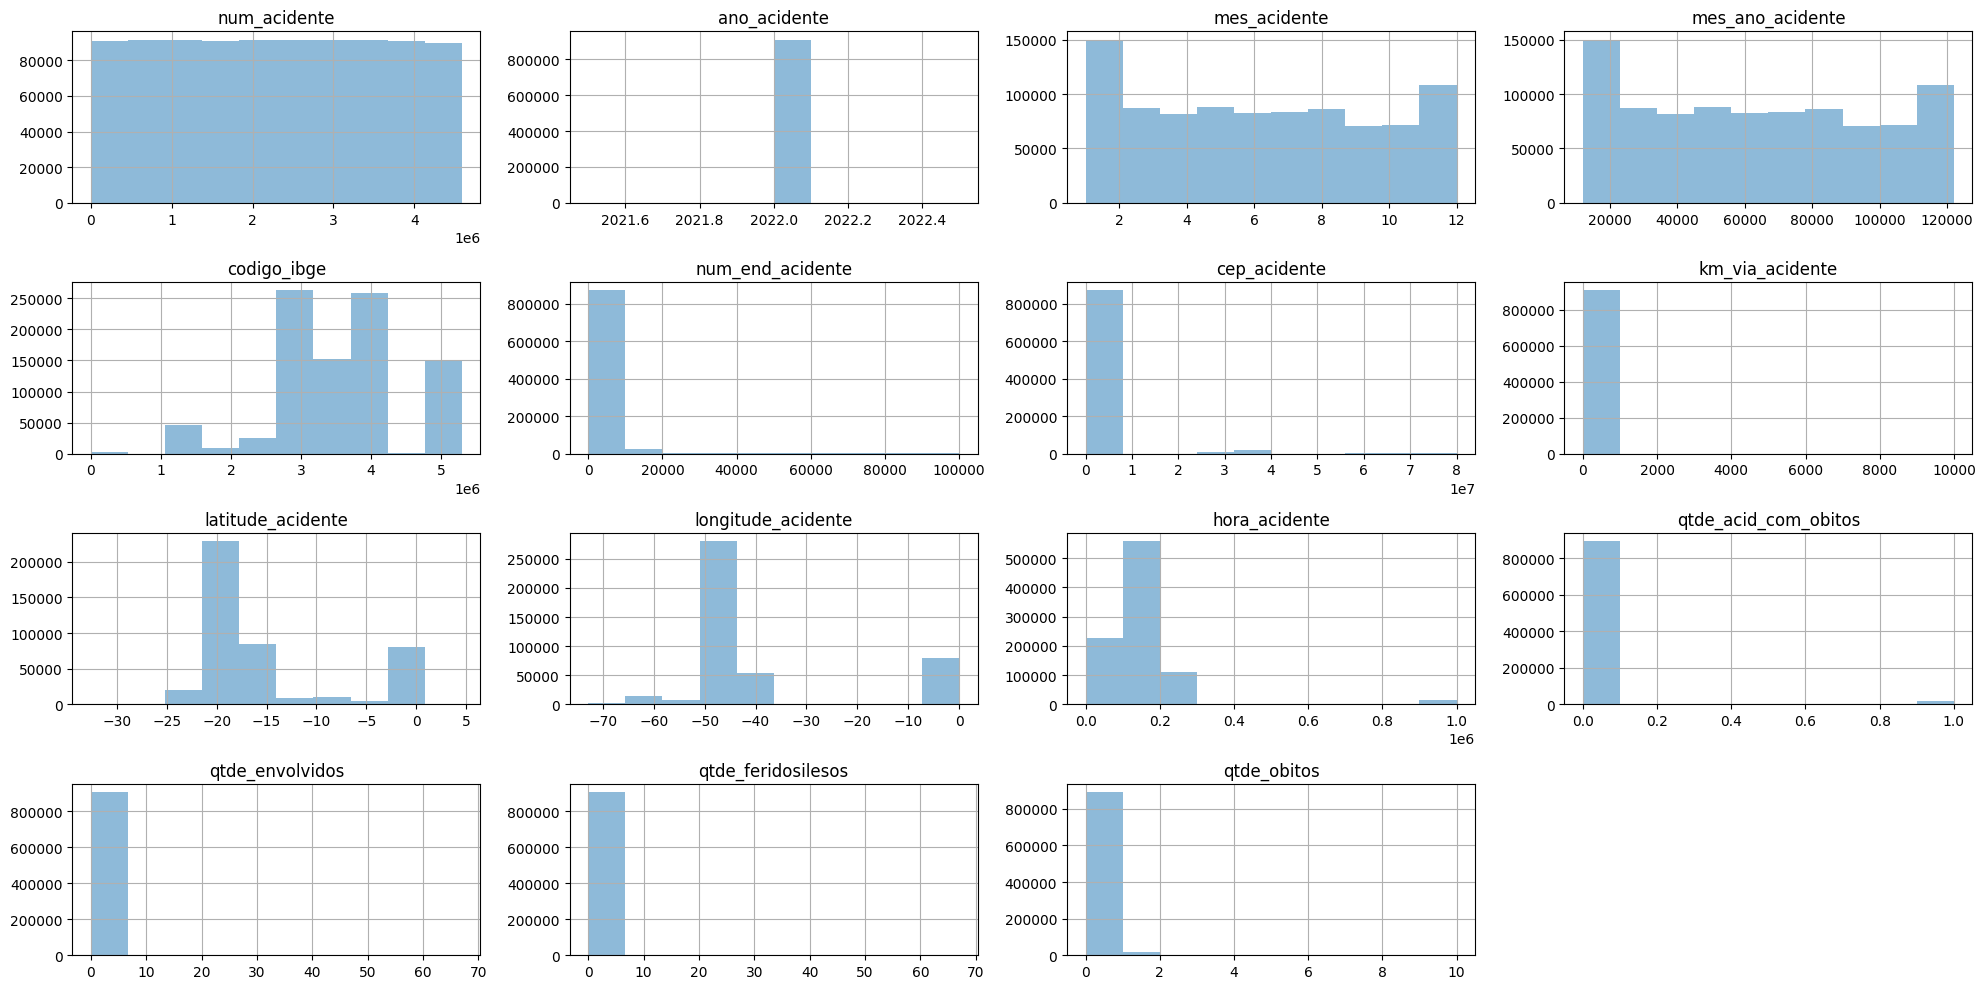

In [37]:

# Selecionando as colunas que são numericas
filterd_dataset = acidentes[[
    'num_acidente',
    'ano_acidente',
    'mes_acidente',
    'mes_ano_acidente',
    'codigo_ibge',
    'num_end_acidente',
    'cep_acidente',
    'km_via_acidente',
    'latitude_acidente',
    'longitude_acidente',
    'hora_acidente',
    'qtde_acid_com_obitos',
    'qtde_envolvidos',
    'qtde_feridosilesos',
    'qtde_obitos'
    ]]
# Renomei algumas colunas para facilitar a leitura

# Plotando os graficos
filterd_dataset.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

Nesse caso é percebivel que km_via_acidente, num_end_acidente, hora_acidente, qtde_acid_com_obitos, qtde_envolvidos, qtde_feridosilesos, qtde_obitos tem outlier e os graficos não esta consizo, os outro que tambem estão outlier que eu nao coloquei são numericos 'categoricos' ou seja ele nao representam grandeza e sim posicoes ou categorias.

#### Explorando localidades:

In [ ]:
localidades.head(2)

,Unnamed: 0,chv_localidade,ano_referencia,mes_referencia,mes_ano_referencia,regiao,uf,codigo_ibge,municipio,regiao_metropolitana,qtde_habitantes,frota_total,frota_circulante
0,1104,AC1200393202201,2022,1,12022,NORTE,AC,1200393,PORTO WALTER,nao,12497,394,295
1,1105,AC1200179202201,2022,1,12022,NORTE,AC,1200179,CAPIXABA,nao,12280,2677,2058


In [ ]:
localidades.describe()

,Unnamed: 0,ano_referencia,mes_referencia,mes_ano_referencia,codigo_ibge,qtde_habitantes,frota_total,frota_circulante
count,67164.000000,67164.0,67164.000000,67164.000000,6.716400e+04,6.716400e+04,6.716400e+04,6.716400e+04
mean,177470.371896,2022.0,6.500000,67022.000000,3.237895e+06,3.823682e+04,2.023266e+04,1.357508e+04
std,97353.936859,0.0,3.452078,34520.782285,1.007983e+06,2.245515e+05,1.455164e+05,8.695565e+04
min,1104.000000,2022.0,1.000000,12022.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,122822.750000,2022.0,3.750000,39522.000000,2.510402e+06,5.381000e+03,1.991000e+03,1.309000e+03
50%,167981.500000,2022.0,6.500000,67022.000000,3.145372e+06,1.164750e+04,4.254000e+03,2.781000e+03
75%,263444.250000,2022.0,9.250000,94522.000000,4.118709e+06,2.574825e+04,1.115925e+04,7.272000e+03
max,335819.000000,2022.0,12.000000,122022.000000,5.300108e+06,1.246966e+07,9.148454e+06,5.059283e+06


In [ ]:
localidades.columns

Index(['Unnamed: 0', 'chv_localidade', 'ano_referencia', 'mes_referencia',
       'mes_ano_referencia', 'regiao', 'uf', 'codigo_ibge', 'municipio',
       'regiao_metropolitana', 'qtde_habitantes', 'frota_total',
       'frota_circulante'],
      dtype='object')

#### Explorando tipo veiculos:

In [ ]:
tipo_veiculos.head(2)

,num_acidente;tipo_veiculo;ind_veic_estrangeiro;qtde_veiculos
0,57;NAO INFORMADO;NAO INFORMADO;1
1,76;NAO INFORMADO;NAO INFORMADO;1


In [ ]:
tipo_veiculos.describe()

,num_acidente;tipo_veiculo;ind_veic_estrangeiro;qtde_veiculos
count,5189601
unique,5189601
top,4584066;DESCONHECIDO;DESCONHECIDO;1
freq,1


In [ ]:
tipo_veiculos.columns

Index(['num_acidente;tipo_veiculo;ind_veic_estrangeiro;qtde_veiculos'], dtype='object')

#### Explorando vitimas:

In [ ]:
vitimas.head(2)

,Unnamed: 0,num_acidente,chv_localidade,data_acidente,uf_acidente,ano_acidente,mes_acidente,mes_ano_acidente,faixa_idade,genero,tp_envolvido,gravidade_lesao,equip_seguranca,ind_motorista,susp_alcool,qtde_envolvidos,qtde_feridosilesos,qtde_obitos
0,31977,4231902,AC1200401202201,2022-01-28,AC,2022,1,12022,ENTRE 18 E 24 ANOS,MASCULINO,MOTORISTA,NAO INFORMADO,NAO INFORMADO,SIM,NAO INFORMADO,1,1,0
1,31978,1889037,AC1200401202201,2022-01-08,AC,2022,1,12022,NAO INFORMADO,NAO INFORMADO,MOTORISTA,NAO INFORMADO,NAO INFORMADO,SIM,NAO INFORMADO,1,1,0


In [ ]:
vitimas.describe()

,Unnamed: 0,num_acidente,ano_acidente,mes_acidente,mes_ano_acidente,qtde_envolvidos,qtde_feridosilesos,qtde_obitos
count,1.465440e+06,1.465440e+06,1465440.0,1.465440e+06,1.465440e+06,1.465440e+06,1.465440e+06,1.465440e+06
mean,3.906723e+06,2.292301e+06,2022.0,6.142282e+00,6.344482e+04,9.604399e-01,9.474943e-01,1.294560e-02
std,1.883160e+06,1.322630e+06,0.0,3.294830e+00,3.294830e+04,3.232068e-01,3.394770e-01,1.163890e-01
min,3.197700e+04,1.000000e+00,2022.0,1.000000e+00,1.202200e+04,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.226264e+06,1.147623e+06,2022.0,3.000000e+00,3.202200e+04,1.000000e+00,1.000000e+00,0.000000e+00
50%,3.592624e+06,2.292832e+06,2022.0,6.000000e+00,6.202200e+04,1.000000e+00,1.000000e+00,0.000000e+00
75%,5.737873e+06,3.435759e+06,2022.0,9.000000e+00,9.202200e+04,1.000000e+00,1.000000e+00,0.000000e+00
max,7.008373e+06,4.588682e+06,2022.0,1.200000e+01,1.220220e+05,5.400000e+01,5.400000e+01,7.000000e+00


In [ ]:
vitimas.columns

Index(['Unnamed: 0', 'num_acidente', 'chv_localidade', 'data_acidente',
       'uf_acidente', 'ano_acidente', 'mes_acidente', 'mes_ano_acidente',
       'faixa_idade', 'genero', 'tp_envolvido', 'gravidade_lesao',
       'equip_seguranca', 'ind_motorista', 'susp_alcool', 'qtde_envolvidos',
       'qtde_feridosilesos', 'qtde_obitos'],
      dtype='object')

#### Trabalhando os dados:

In [ ]:
rondonia = acidentes[acidentes['uf_acidente'] == 'RO']
rondonia.head(2)

,Unnamed: 0,num_acidente,chv_localidade,data_acidente,uf_acidente,ano_acidente,mes_acidente,mes_ano_acidente,codigo_ibge,dia_semana,...,lim_velocidade,tp_pista,ind_guardrail,ind_cantcentral,ind_acostamento,qtde_acidente,qtde_acid_com_obitos,qtde_envolvidos,qtde_feridosilesos,qtde_obitos
597284,3142918,600642,RO1100049202201,2022-01-28,RO,2022,1,12022,1100049,SEXTA-FEIRA,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,3,3,0
597285,3142919,705720,RO1100205202201,2022-01-04,RO,2022,1,12022,1100205,TERCA-FEIRA,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0


In [ ]:
merge_localidades = pd.merge(rondonia, localidades, on='chv_localidade')
merge_localidades.head(2)

,Unnamed: 0_x,num_acidente,chv_localidade,data_acidente,uf_acidente,ano_acidente,mes_acidente,mes_ano_acidente,codigo_ibge_x,dia_semana,...,mes_referencia,mes_ano_referencia,regiao,uf,codigo_ibge_y,municipio,regiao_metropolitana,qtde_habitantes,frota_total,frota_circulante
0,3142918,600642,RO1100049202201,2022-01-28,RO,2022,1,12022,1100049,SEXTA-FEIRA,...,1,12022,NORTE,RO,1100049,CACOAL,nao,86416,76029,56817
1,3142919,705720,RO1100205202201,2022-01-04,RO,2022,1,12022,1100205,TERCA-FEIRA,...,1,12022,NORTE,RO,1100205,PORTO VELHO,nao,548952,302563,228599


In [ ]:
# Agrupei pelos municipios e contei, peguei o num de acidentes e organizei alguns valores
total_acidentes = merge_localidades.groupby('municipio').count()['num_acidente'].sort_values(ascending=False)

total_acidentes

municipio
PORTO VELHO                  5592
JI-PARANA                    1374
VILHENA                      1330
CACOAL                        971
ARIQUEMES                     966
ROLIM DE MOURA                696
JARU                          449
PIMENTA BUENO                 405
ESPIGAO D OESTE               266
OURO PRETO DO OESTE           263
GUAJARA-MIRIM                 185
MACHADINHO D OESTE            175
ALTA FLORESTA D OESTE         174
SAO MIGUEL DO GUAPORE         158
BURITIS                       143
CANDEIAS DO JAMARI            143
CEREJEIRAS                    127
PRESIDENTE MEDICI             115
COLORADO DO OESTE             102
SAO FRANCISCO DO GUAPORE       99
NOVA BRASILANDIA D OESTE       95
ALVORADA D OESTE               94
CUJUBIM                        93
ALTO PARAISO                   82
NOVA MAMORE                    82
ITAPUA DO OESTE                71
COSTA MARQUES                  60
ALTO ALEGRE DOS PARECIS        59
MONTE NEGRO                    57
CHUP

In [ ]:
# Quero fazer a media dos dados da população 
populacao_estadual = merge_localidades.groupby('municipio')['qtde_habitantes'].mean()
populacao_estadual

municipio
ALTA FLORESTA D OESTE         22082.781609
ALTO ALEGRE DOS PARECIS       13135.389831
ALTO PARAISO                  22391.524390
ALVORADA D OESTE              13438.840426
ARIQUEMES                    111442.517598
BURITIS                       41245.937063
CABIXI                         4918.772727
CACAULANDIA                    6284.444444
CACOAL                        86024.110196
CAMPO NOVO DE RONDONIA        14347.476190
CANDEIAS DO JAMARI            28389.552448
CASTANHEIRAS                   2853.727273
CEREJEIRAS                    15833.259843
CHUPINGUAIA                   11863.875000
COLORADO DO OESTE             14772.911765
CORUMBIARA                     6845.641509
COSTA MARQUES                 19438.550000
CUJUBIM                       27724.397849
ESPIGAO D OESTE               32944.338346
GOVERNADOR JORGE TEIXEIRA      6714.772727
GUAJARA-MIRIM                 46789.994595
ITAPUA DO OESTE               10863.521127
JARU                          50868.345212
J

In [ ]:
resultado = total_acidentes/populacao_estadual *100
resultado.sort_values(ascending=False)


municipio
VILHENA                      1.261407
ROLIM DE MOURA               1.254256
CACOAL                       1.128753
PIMENTA BUENO                1.096834
JI-PARANA                    1.051893
PORTO VELHO                  1.013482
JARU                         0.882671
ARIQUEMES                    0.866815
PRIMAVERA DE RONDONIA        0.850391
SANTA LUZIA D OESTE          0.833808
ESPIGAO D OESTE              0.807422
CEREJEIRAS                   0.802109
ALTA FLORESTA D OESTE        0.787944
CORUMBIARA                   0.774215
OURO PRETO DO OESTE          0.754539
ALVORADA D OESTE             0.699465
COLORADO DO OESTE            0.690453
SAO MIGUEL DO GUAPORE        0.687170
ITAPUA DO OESTE              0.653563
PRESIDENTE MEDICI            0.653493
SAO FELIPE D OESTE           0.642831
TEIXEIROPOLIS                0.613744
PIMENTEIRAS DO OESTE         0.572975
NOVO HORIZONTE DO OESTE      0.559887
THEOBROMA                    0.528981
CANDEIAS DO JAMARI           0.503706
CH